# Imports and Setup


In [1]:
import os

os.chdir(
    "C:/Users/luism/Documents/Programacion_local/Clase/4o Año/Descubrimiento Datos Complejos/DCDC-Proyecto-Stocks"
)
os.listdir()

['.git',
 '.gitattributes',
 '.gitignore',
 'assets',
 'data',
 'data_cleaning.md',
 'motivation.md',
 'notebooks',
 'README.md']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_columns", 41)

In [4]:
START_DATE = "2012-01-03"
END_DATE = "2020-12-31"

# Data load


In [5]:
stocks_data_path = [
    "data/raw/NASDAQ_stock_data_part1.csv",
    "data/raw/NASDAQ_stock_data_part2.csv",
    "data/raw/NASDAQ_stock_data_part3.csv",
    "data/raw/NASDAQ_stock_data_part4.csv",
]

In [6]:
df = pd.DataFrame()

for file in stocks_data_path:
    df = pd.concat([df, pd.read_csv(file, index_col=0)])

In [7]:
display(df)
display(df.shape)

,Date,AAIT_Adj Close,AAIT_Close,AAIT_High,AAIT_Low,AAIT_Open,AAIT_Volume,AAL_Adj Close,AAL_Close,AAL_High,AAL_Low,AAL_Open,AAL_Volume,AAME_Adj Close,AAME_Close,AAME_High,AAME_Low,AAME_Open,AAME_Volume,AAOI_Adj Close,...,ZSPH_Open,ZSPH_Volume,ZUMZ_Adj Close,ZUMZ_Close,ZUMZ_High,ZUMZ_Low,ZUMZ_Open,ZUMZ_Volume,ZU_Adj Close,ZU_Close,ZU_High,ZU_Low,ZU_Open,ZU_Volume,Z_Adj Close,Z_Close,Z_High,Z_Low,Z_Open,Z_Volume
0,2012-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.826837,5.120000,5.220000,5.07,5.200000,6105900,1.828209,1.97,1.99,1.96,1.96,1400,NaN,...,NaN,NaN,26.459999,26.459999,27.990000,25.760000,27.629999,1154200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.741990,5.030000,5.180000,4.97,5.090000,5268700,1.818928,1.96,1.96,1.96,1.96,400,NaN,...,NaN,NaN,26.330000,26.330000,26.740000,25.570000,26.219999,832200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.156795,5.470000,5.480000,5.07,5.150000,8216100,1.883890,2.03,2.03,1.99,1.99,2300,NaN,...,NaN,NaN,30.950001,30.950001,30.959999,28.180000,29.170000,3093500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.279352,5.600000,5.670000,5.40,5.440000,8323000,1.837489,1.98,2.00,1.94,2.00,1900,NaN,...,NaN,NaN,31.270000,31.270000,31.830000,30.469999,31.150000,1352700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.392481,5.720000,5.800000,5.55,5.560000,8029900,1.874610,2.02,2.04,2.00,2.03,5800,NaN,...,NaN,NaN,31.780001,31.780001,31.820000,30.600000,31.290001,515000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2020-12-24 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,15.660000,15.660000,16.040001,15.53,16.040001,31048900,2.069195,2.08,2.14,2.08,2.14,500,8.77,...,NaN,NaN,36.009998,36.009998,37.139999,35.970001,36.939999,94800,NaN,NaN,NaN,NaN,NaN,NaN,138.639999,138.639999,143.100006,138.350006,141.582993,839300.0
2261,2020-12-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,16.059999,16.059999,16.459999,15.91,15.970000,61099000,2.089091,2.10,2.14,2.10,2.12,3600,8.93,...,NaN,NaN,36.709999,36.709999,37.240002,35.830002,36.230000,233800,NaN,NaN,NaN,NaN,NaN,NaN,132.679993,132.679993,140.854996,131.380005,139.690002,2136200.0
2262,2020-12-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,15.860000,15.860000,16.410000,15.75,16.320000,51559500,2.089091,2.10,2.10,2.05,2.07,1300,8.80,...,NaN,NaN,36.610001,36.610001,36.919998,35.849998,36.919998,174400,NaN,NaN,NaN,NaN,NaN,NaN,130.559998,130.559998,134.649994,126.430000,133.619995,2752600.0
2263,2020-12-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,16.150000,16.150000,16.200001,15.72,15.850000,49520200,2.089091,2.10,2.15,2.10,2.12,7000,8.60,...,NaN,NaN,36.619999,36.619999,37.299999,36.270000,36.500000,145100,NaN,NaN,NaN,NaN,NaN,NaN,130.449997,130.449997,132.955002,129.360001,130.850006,1170100.0


(2265, 17803)

In [8]:
print(f"Size in memory: {df.memory_usage(deep=True).sum() / 1024 / 1024} MB")

Size in memory: 307.80598640441895 MB


In [9]:
df_original = df.copy()

In [10]:
from collections import Counter

print(Counter(df.dtypes))
# dtypes are expected to be all floats and a datatetime.
# We obtain one "Object" dtype (which will be our date) and int64 dtypes which are not expected.

Counter({dtype('float64'): 16653, dtype('int64'): 1149, dtype('O'): 1})


# Check for all dates required


In [11]:
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])

display(df.head())
print("df Date dtype:", df.dtypes.iloc[0])

,Date,AAIT_Adj Close,AAIT_Close,AAIT_High,AAIT_Low,AAIT_Open,AAIT_Volume,AAL_Adj Close,AAL_Close,AAL_High,AAL_Low,AAL_Open,AAL_Volume,AAME_Adj Close,AAME_Close,AAME_High,AAME_Low,AAME_Open,AAME_Volume,AAOI_Adj Close,...,ZSPH_Open,ZSPH_Volume,ZUMZ_Adj Close,ZUMZ_Close,ZUMZ_High,ZUMZ_Low,ZUMZ_Open,ZUMZ_Volume,ZU_Adj Close,ZU_Close,ZU_High,ZU_Low,ZU_Open,ZU_Volume,Z_Adj Close,Z_Close,Z_High,Z_Low,Z_Open,Z_Volume
0,2012-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.826837,5.12,5.22,5.07,5.20,6105900,1.828209,1.97,1.99,1.96,1.96,1400,NaN,...,NaN,NaN,26.459999,26.459999,27.990000,25.760000,27.629999,1154200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.741990,5.03,5.18,4.97,5.09,5268700,1.818928,1.96,1.96,1.96,1.96,400,NaN,...,NaN,NaN,26.330000,26.330000,26.740000,25.570000,26.219999,832200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.156795,5.47,5.48,5.07,5.15,8216100,1.883890,2.03,2.03,1.99,1.99,2300,NaN,...,NaN,NaN,30.950001,30.950001,30.959999,28.180000,29.170000,3093500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.279352,5.60,5.67,5.40,5.44,8323000,1.837489,1.98,2.00,1.94,2.00,1900,NaN,...,NaN,NaN,31.270000,31.270000,31.830000,30.469999,31.150000,1352700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.392481,5.72,5.80,5.55,5.56,8029900,1.874610,2.02,2.04,2.00,2.03,5800,NaN,...,NaN,NaN,31.780001,31.780001,31.820000,30.600000,31.290001,515000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


df Date dtype: datetime64[ns, UTC]


In [12]:
from io import StringIO

# We are gonna inspect that there are data for all the dates in our range date. However we will discard those days in which there is no stock tradin which are all Saturdays, Sundays and public holidays.

# To get the days of public holidays we are gonna manually get it om "https://www.investing.com/holiday-calendar/" setting the date range to min and max dates we get


data = """\
Date	Country	Exchange Name	Holiday
Jan 16, 2012	 United States	New York Stock Exchange	Martin Luther King, Jr. Day
Feb 20, 2012	 United States	New York Stock Exchange	Presidents' Day
Apr 06, 2012	 United States	New York Stock Exchange	Good Friday
May 28, 2012	 United States	New York Stock Exchange	Memorial Day
Jul 04, 2012	 United States	New York Stock Exchange	Independence Day
Sep 03, 2012	 United States	New York Stock Exchange	Labor Day
Oct 29, 2012	 United States	New York Stock Exchange	Hurricane Sandy
Oct 30, 2012	 United States	New York Stock Exchange	Hurricane Sandy
Nov 22, 2012	 United States	New York Stock Exchange	Thanksgiving Day
Nov 23, 2012	 United States	New York Stock Exchange	The Day After Thanksgiving - Early close at 13:00
Dec 24, 2012	 United States	New York Stock Exchange	Christmas Eve - Early close at 13:00
Dec 25, 2012	 United States	New York Stock Exchange	Christmas
Jan 01, 2013	 United States	New York Stock Exchange	New Year's Day
Jan 21, 2013	 United States	New York Stock Exchange	Martin Luther King, Jr. Day
Feb 18, 2013	 United States	New York Stock Exchange	Washington's Birthday
Mar 29, 2013	 United States	New York Stock Exchange	Good Friday
May 27, 2013	 United States	New York Stock Exchange	Memorial Day
Jul 03, 2013	 United States	New York Stock Exchange	The Day Before Independence Day - Early close at 13:00
Jul 04, 2013	 United States	New York Stock Exchange	Independence Day
Sep 02, 2013	 United States	New York Stock Exchange	Labor Day
Nov 28, 2013	 United States	New York Stock Exchange	Thanksgiving Day
Nov 29, 2013	 United States	New York Stock Exchange	The Day After Thanksgiving - Early close at 13:00
Dec 24, 2013	 United States	New York Stock Exchange	Christmas Eve - Early close at 13:00
Dec 25, 2013	 United States	New York Stock Exchange	Christmas
Jan 01, 2014	 United States	New York Stock Exchange	New Year's Day
Jan 20, 2014	 United States	New York Stock Exchange	Martin Luther King, Jr. Day
Feb 17, 2014	 United States	New York Stock Exchange	Washington's Birthday
Apr 18, 2014	 United States	New York Stock Exchange	Good Friday
May 26, 2014	 United States	New York Stock Exchange	Memorial Day
Jul 03, 2014	 United States	New York Stock Exchange	Independence Day - Early close at 13:00
Jul 04, 2014	 United States	New York Stock Exchange	Independence Day
Sep 01, 2014	 United States	New York Stock Exchange	Labor Day
Nov 27, 2014	 United States	New York Stock Exchange	Thanksgiving Day
Nov 28, 2014	 United States	New York Stock Exchange	The Day After Thanksgiving - Early close at 13:00
Dec 24, 2014	 United States	New York Stock Exchange	Christmas Eve - Early close at 13:00
Dec 25, 2014	 United States	New York Stock Exchange	Christmas
Jan 01, 2015	 United States	New York Stock Exchange	New Year's Day
Jan 19, 2015	 United States	New York Stock Exchange	Martin Luther King, Jr. Day
Feb 16, 2015	 United States	New York Stock Exchange	Washington's Birthday
Apr 03, 2015	 United States	New York Stock Exchange	Good Friday
May 25, 2015	 United States	New York Stock Exchange	Memorial Day
Jul 03, 2015	 United States	New York Stock Exchange	Independence Day
Sep 07, 2015	 United States	New York Stock Exchange	Labor Day
Nov 26, 2015	 United States	New York Stock Exchange	Thanksgiving Day
Nov 27, 2015	 United States	New York Stock Exchange	Day following Thanksgiving - Early close at 13:30
Dec 24, 2015	 United States	New York Stock Exchange	Christmas Eve - Early close at 13:00
Dec 25, 2015	 United States	New York Stock Exchange	Christmas Day
Jan 01, 2016	 United States	New York Stock Exchange	New Year's Day
Jan 18, 2016	 United States	New York Stock Exchange	Martin Luther King, Jr. Day
Feb 15, 2016	 United States	New York Stock Exchange	Presidents' Day
Mar 25, 2016	 United States	New York Stock Exchange	Good Friday
May 30, 2016	 United States	New York Stock Exchange	Memorial Day
Jul 04, 2016	 United States	New York Stock Exchange	Independence Day
Sep 05, 2016	 United States	New York Stock Exchange	Labor Day
Nov 24, 2016	 United States	New York Stock Exchange	Thanksgiving Day
Nov 25, 2016	 United States	New York Stock Exchange	The Day After Thanksgiving - Early close at 13:00
Dec 26, 2016	 United States	New York Stock Exchange	Christmas
Jan 02, 2017	 United States	New York Stock Exchange	New Year's Day
Jan 16, 2017	 United States	New York Stock Exchange	Martin Luther King, Jr. Day
Feb 20, 2017	 United States	New York Stock Exchange	Presidents' Day
Apr 14, 2017	 United States	New York Stock Exchange	Good Friday
May 29, 2017	 United States	New York Stock Exchange	Memorial Day
Jul 03, 2017	 United States	New York Stock Exchange	Independence Day - Early close at 13:00
Jul 04, 2017	 United States	New York Stock Exchange	Independence Day
Sep 04, 2017	 United States	New York Stock Exchange	Labor Day
Nov 23, 2017	 United States	New York Stock Exchange	Thanksgiving Day
Nov 24, 2017	 United States	New York Stock Exchange	The Day After Thanksgiving - Early close at 13:00
Dec 25, 2017	 United States	New York Stock Exchange	Christmas
Jan 01, 2018	 United States	New York Stock Exchange	New Year's Day
Jan 15, 2018	 United States	New York Stock Exchange	Martin Luther King, Jr. Day
Feb 19, 2018	 United States	New York Stock Exchange	Washington's Birthday
Mar 30, 2018	 United States	New York Stock Exchange	Good Friday
May 28, 2018	 United States	New York Stock Exchange	Memorial Day
Jul 03, 2018	 United States	New York Stock Exchange	Independence Day - Early close at 13:00
Jul 04, 2018	 United States	New York Stock Exchange	Independence Day
Sep 03, 2018	 United States	New York Stock Exchange	Labor Day USA
Nov 22, 2018	 United States	New York Stock Exchange	Thanksgiving Day
Nov 23, 2018	 United States	New York Stock Exchange	Thanksgiving Day - Early close at 13:00
Dec 05, 2018	 United States	New York Stock Exchange	Mourning - In Honor Of George H.W. Bush
Dec 24, 2018	 United States	New York Stock Exchange	Christmas Eve - Early close at 13:00
Dec 25, 2018	 United States	New York Stock Exchange	Christmas
Jan 01, 2019	 United States	New York Stock Exchange	New Year's Day
Jan 21, 2019	 United States	New York Stock Exchange	Martin Luther King, Jr. Day
Feb 18, 2019	 United States	New York Stock Exchange	Washington's Birthday
Apr 19, 2019	 United States	New York Stock Exchange	Good Friday
May 27, 2019	 United States	New York Stock Exchange	Memorial Day
Jul 03, 2019	 United States	New York Stock Exchange	Independence Day - Early close at 13:00
Jul 04, 2019	 United States	New York Stock Exchange	Independence Day
Sep 02, 2019	 United States	New York Stock Exchange	Labor Day
Nov 28, 2019	 United States	New York Stock Exchange	Thanksgiving Day
Nov 29, 2019	 United States	New York Stock Exchange	Thanksgiving Day - Early close at 13:00
Dec 24, 2019	 United States	New York Stock Exchange	Christmas - Early close at 13:00
Dec 25, 2019	 United States	New York Stock Exchange	Christmas
Jan 01, 2020	 United States	New York Stock Exchange	New Year's Day
Jan 20, 2020	 United States	New York Stock Exchange	Martin Luther King, Jr. Day
Feb 17, 2020	 United States	New York Stock Exchange	Washington's Birthday
Apr 10, 2020	 United States	New York Stock Exchange	Good Friday
May 25, 2020	 United States	New York Stock Exchange	Memorial Day
Jul 03, 2020	 United States	New York Stock Exchange	Independence Day
Sep 07, 2020	 United States	New York Stock Exchange	Labor Day
Nov 26, 2020	 United States	New York Stock Exchange	Thanksgiving Day
Nov 27, 2020	 United States	New York Stock Exchange	Thanksgiving Day - Early close at 13:00
Dec 24, 2020	 United States	New York Stock Exchange	Christmas - Early close at 13:00
Dec 25, 2020	 United States	New York Stock Exchange	Christmas
Jan 01, 2021	 United States	New York Stock Exchange	New Year's Day
Jan 18, 2021	 United States	New York Stock Exchange	Martin Luther King, Jr. Day
Feb 15, 2021	 United States	New York Stock Exchange	Presidents' Day
Apr 02, 2021	 United States	New York Stock Exchange	Good Friday
May 31, 2021	 United States	New York Stock Exchange	Memorial Day
Jul 05, 2021	 United States	New York Stock Exchange	Independence Day
Sep 06, 2021	 United States	New York Stock Exchange	Labor Day
Nov 25, 2021	 United States	New York Stock Exchange	Thanksgiving Day
Nov 26, 2021	 United States	New York Stock Exchange	Thanksgiving Day - Early close at 13:00
Dec 24, 2021	 United States	New York Stock Exchange	Christmas
Jan 17, 2022	 United States	New York Stock Exchange	Martin Luther King, Jr. Day
Feb 21, 2022	 United States	New York Stock Exchange	Presidents' Day
Apr 15, 2022	 United States	New York Stock Exchange	Good Friday
May 30, 2022	 United States	New York Stock Exchange	Memorial Day
Jun 20, 2022	 United States	New York Stock Exchange	Juneteenth
Jul 04, 2022	 United States	New York Stock Exchange	Independence Day
Sep 05, 2022	 United States	New York Stock Exchange	Labor Day
Nov 24, 2022	 United States	New York Stock Exchange	Thanksgiving Day
Nov 25, 2022	 United States	New York Stock Exchange	Thanksgiving Day - Early close at 13:00
Dec 26, 2022	 United States	New York Stock Exchange	Christmas
Jan 02, 2023	 United States	New York Stock Exchange	New Year's Day
Jan 16, 2023	 United States	New York Stock Exchange	Martin Luther King, Jr. Day
Feb 20, 2023	 United States	New York Stock Exchange	Washington's Birthday
Apr 07, 2023	 United States	New York Stock Exchange	Good Friday
May 29, 2023	 United States	New York Stock Exchange	Memorial Day
Jun 19, 2023	 United States	New York Stock Exchange	Juneteenth
Jul 03, 2023	 United States	New York Stock Exchange	Independence Day - Early close at 13:00
Jul 04, 2023	 United States	New York Stock Exchange	Independence Day
Sep 04, 2023	 United States	New York Stock Exchange	Labor Day
Nov 23, 2023	 United States	New York Stock Exchange	Thanksgiving Day
Nov 24, 2023	 United States	New York Stock Exchange	Thanksgiving Day - Early close at 13:00
Dec 25, 2023	 United States	New York Stock Exchange	Christmas
Jan 01, 2024	 United States	New York Stock Exchange	New Year's Day
Jan 15, 2024	 United States	New York Stock Exchange	Martin Luther King, Jr. Day
Feb 19, 2024	 United States	New York Stock Exchange	Washington's Birthday
Mar 29, 2024	 United States	New York Stock Exchange	Good Friday
"""

dates_wanted_df = pd.Series(pd.date_range(df["Date"].min(), df["Date"].max()))

# Now we remove all Saturdays and Sundays
print("Shape with weekends", dates_wanted_df.shape)
before_remove = dates_wanted_df.shape
dates_wanted_df = dates_wanted_df[dates_wanted_df.dt.dayofweek < 5]
after_remove = dates_wanted_df.shape
print("Shape without weekends", dates_wanted_df.shape)
print(f"Removed: {before_remove[0] - after_remove[0]}")

# Now we remove all holidays if they were full day close (some days have early closes at 13:00)
holidays_df = pd.read_csv(StringIO(data), sep="\t")
holidays_df["Date"] = pd.to_datetime(holidays_df["Date"], utc=True)
print("Holidays df Date dtype", holidays_df["Date"].dtype)

print("-" * 50)
print("Shape with holidays", dates_wanted_df.shape)
before_remove = dates_wanted_df.shape
dates_wanted_df = dates_wanted_df[
    ~dates_wanted_df.isin(
        holidays_df.loc[~holidays_df["Holiday"].str.contains("Early")]["Date"]
    )
]
after_remove = dates_wanted_df.shape
print("Shape without holidays", dates_wanted_df.shape)
print(
    f"Removed: {before_remove[0] - after_remove[0]} - Len holidays (includes holidays till 2024): {holidays_df.shape[0]}"
)

dates_wanted_df = dates_wanted_df.sort_values()
dates_wanted_df = dates_wanted_df.to_frame()
dates_wanted_df.columns = ["Date"]

Shape with weekends (3286,)
Shape without weekends (2348,)
Removed: 938
Holidays df Date dtype datetime64[ns, UTC]
--------------------------------------------------
Shape with holidays (2348,)
Shape without holidays (2265,)
Removed: 83 - Len holidays (includes holidays till 2024): 140


In [13]:
# Now that we have a Series with all the dates that we expect to have data, we correlate with which days we have data

# Add the substraction of the two series
print("Len wanted dates", dates_wanted_df["Date"].shape)
print("Len dates of data", df["Date"].shape)

# Dates that are in the wanted but not in the data
print("-" * 100)
print("Dates wanted but not in data")
display(dates_wanted_df["Date"].loc[~dates_wanted_df["Date"].isin(df["Date"])])

# Dates that are in the data but not in the wanted
print("-" * 100)
print("Dates in data but not wanted")
display(df["Date"].loc[~df["Date"].isin(dates_wanted_df["Date"])])

# Are they the same
print("-" * 100)
print("Do they have the same dates?")
print(all(df["Date"].values == dates_wanted_df["Date"].values))

Len wanted dates (2265,)
Len dates of data (2265,)
----------------------------------------------------------------------------------------------------
Dates wanted but not in data


Series([], Name: Date, dtype: datetime64[ns, UTC])

----------------------------------------------------------------------------------------------------
Dates in data but not wanted


Series([], Name: Date, dtype: datetime64[ns, UTC])

----------------------------------------------------------------------------------------------------
Do they have the same dates?
True


# Now that we are sure we have rows for all our dates: Check tickers that have or don't have data


In [14]:
# Show which different data we have from each ticker
print(df.columns[1:7].values)

['AAIT_Adj Close' 'AAIT_Close' 'AAIT_High' 'AAIT_Low' 'AAIT_Open'
 'AAIT_Volume']


In [15]:
import tqdm.notebook as tqdm

# Check to see correlation between NANs of same ticker

tickers_cols = []
for i in range(1, len(df.columns), 6):
    tickers_cols.append(np.arange(i, i + 6))
display(df.iloc[:, tickers_cols[0]].head(3))
display(df.iloc[:, tickers_cols[-1]].head(3))

# For every set of columns of each ticker, if all its columns are NaN we remove it from the df

removed = 0
tickers_removed = []
indexes_to_remove = []
pbar = tqdm.tqdm(total=len(tickers_cols))
print("Shape of df before removing NaN tickers", df.shape)
for set_cols in tickers_cols:
    pbar.update(1)
    df_subset = df.iloc[:, set_cols]
    if df_subset.isna().all().all():
        # print(f"Ticker {df_subset.columns[0].split('_')[0]} has all NaNs")
        tickers_removed.append(df_subset.columns[0].split("_")[0])
        # df = df.iloc[:,~df.columns.isin(df_subset.columns)]
        indexes_to_remove.extend(set_cols)
        removed += 1
        pbar.set_description(f"Queued to remove {removed} tickers")
pbar.close()

print("Removing all index columns")
indexes_to_remove = [int(x) for x in indexes_to_remove]
indexes_to_keep = [x for x in range(len(df.columns)) if x not in indexes_to_remove]
df = df.iloc[:, indexes_to_keep]


print("Shape of df after removing NaN tickers", df.shape)
print(f"Removed {removed} tickers")

,AAIT_Adj Close,AAIT_Close,AAIT_High,AAIT_Low,AAIT_Open,AAIT_Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN


,Z_Adj Close,Z_Close,Z_High,Z_Low,Z_Open,Z_Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN


  0%|          | 0/2967 [00:00<?, ?it/s]

Shape of df before removing NaN tickers (2265, 17803)
Removing all index columns
Shape of df after removing NaN tickers (2265, 9235)
Removed 1428 tickers


Pct. of NaNs values: 7.4270%


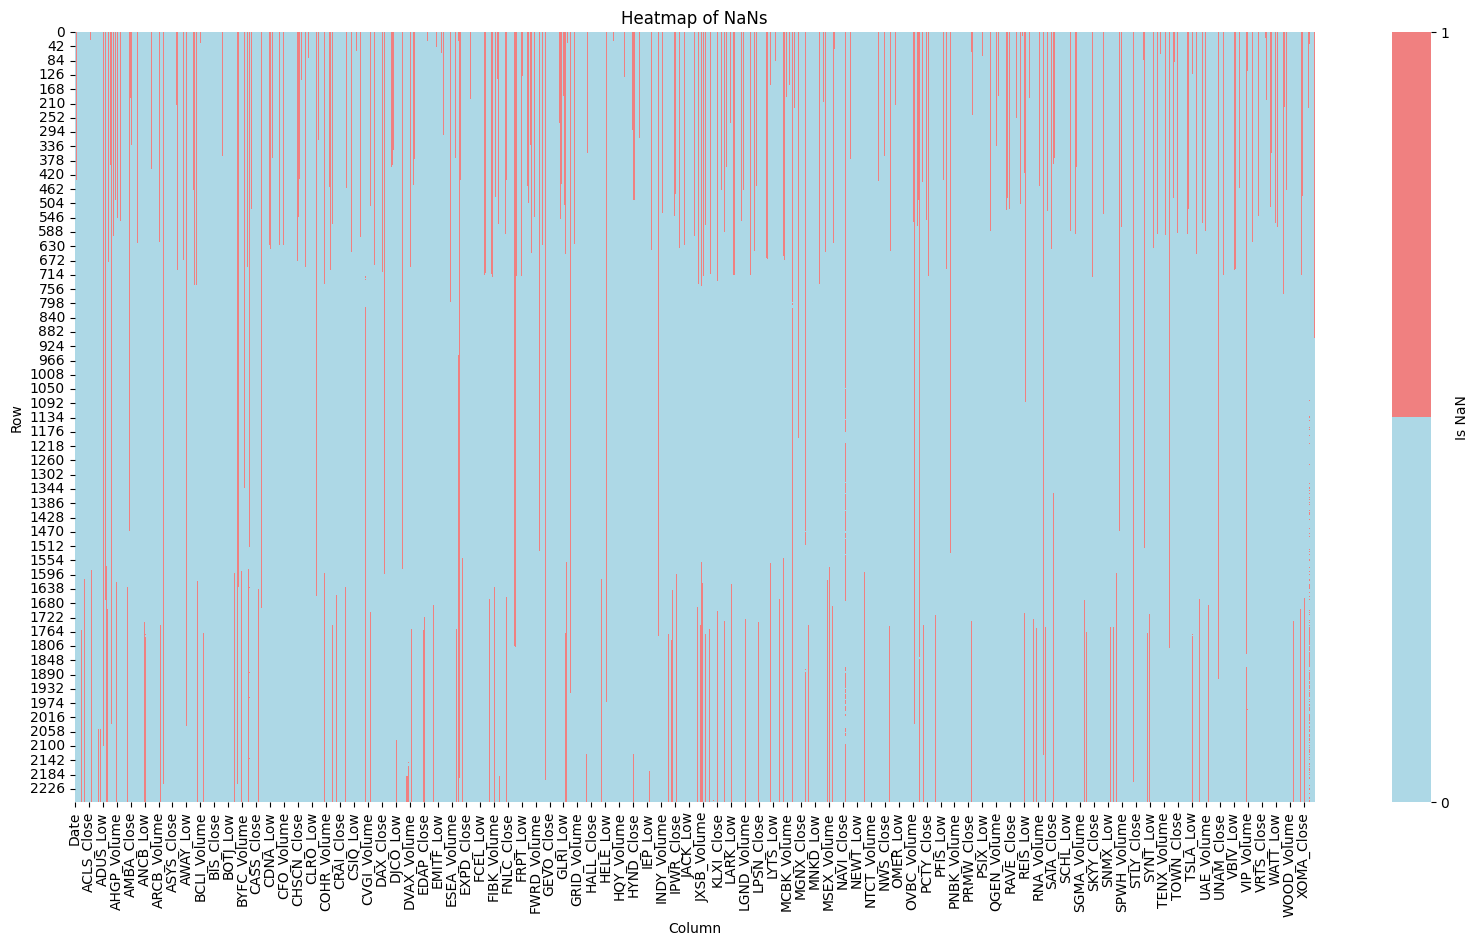

In [16]:
# Heatmap of NaNs
print(
    f"Pct. of NaNs values: {df.isna().values.sum() / (df.shape[0] * df.shape[1]) * 100:.4f}%"
)

fig, ax = plt.subplots(figsize=(20, 10))

# Create a custom palette
cmap = sns.color_palette(
    ["lightblue", "lightcoral"]
)  # Light blue for False, light red for True

# Plot the heatmap with custom color map and color bar
sns.heatmap(
    df.isna(),
    ax=ax,
    cmap=cmap,
    cbar_kws={"ticks": [0, 1], "label": "Is NaN"},
    cbar=True,
)

plt.title("Heatmap of NaNs")
plt.ylabel("Row")
plt.xlabel("Column")

plt.show()

In [17]:
# Seeing that a lot of the Data has Nans up to a certain point, we will consider of dropping all the tickers in which any of its columns there is a Nan.

df_nona = df_original.copy(deep=True)

tickers_cols = []
for i in range(1, len(df_nona.columns), 6):
    tickers_cols.append(np.arange(i, i + 6))
display(df_nona.iloc[:, tickers_cols[0]].head(3))
display(df_nona.iloc[:, tickers_cols[-1]].head(3))

index_to_remove = []
for col_set in tickers_cols:
    subset = df_nona.iloc[:, col_set]
    if subset.isna().any().any():
        index_to_remove.extend(col_set)


print(
    f"Listed {len(index_to_remove)} cols to remove - {len(index_to_remove)//6} tickers to remove"
)
print(f"Shape before removing {df_nona.shape}")
index_to_keep = range(len(df_nona.columns))
indexes_to_keep = list(set(index_to_keep) - set(index_to_remove))
df_nona = df_nona.iloc[:, indexes_to_keep]
print(f"Shape after removing {df_nona.shape}")

,AAIT_Adj Close,AAIT_Close,AAIT_High,AAIT_Low,AAIT_Open,AAIT_Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN


,Z_Adj Close,Z_Close,Z_High,Z_Low,Z_Open,Z_Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN


Listed 10908 cols to remove - 1818 tickers to remove
Shape before removing (2265, 17803)
Shape after removing (2265, 6895)


In [18]:
# Check that removing was correct and that the number of NAs is 0

if df_nona.isna().sum().sum() == 0:
    print("Removing NAs was correct")
else:
    print("Removing NAs was not correct")

Removing NAs was correct


In [19]:
def extract_decimal_value(x):
    return str(x).split(".")[-1]


# Check types
print("Value counts of original:")
print(df_nona.dtypes.value_counts())
display(df_nona.head(2))

# Float64 is for stock prices, Int64 is for the number of shares (volume), object is for the date
df_volume = df_nona.loc[:, df_nona.columns.str.contains("Volume")]
print("-" * 100)
print("Value counts of volume:")
print(df_volume.dtypes.value_counts())
# We see all int64 are volumes but some volumes are float64, check them

# Check decimal values
print("Different decimal values for float64:")
display(
    set(
        list(
            df_volume.select_dtypes(include=["float64"])
            .map(lambda x: extract_decimal_value(x))
            .values.flatten()
        )
    )
)

# Since all decimal values are 0, convert volume data to int64

df_nona = df_nona.astype(
    {col: "int64" for col in df_volume.select_dtypes(include=["float64"]).columns}
)

print("-" * 100)
print("Value counts after casting:")
print(df_nona.dtypes.value_counts())

# Cast date to datetime
print("-" * 100)
df_nona["Date"] = pd.to_datetime(df_nona["Date"])
display(df_nona.head(2))
display(df_nona.dtypes.value_counts())

Value counts of original:
float64    5745
int64      1149
object        1
Name: count, dtype: int64


,Date,AAL_Adj Close,AAL_Close,AAL_High,AAL_Low,AAL_Open,AAL_Volume,AAME_Adj Close,AAME_Close,AAME_High,AAME_Low,AAME_Open,AAME_Volume,AAON_Adj Close,AAON_Close,AAON_High,AAON_Low,AAON_Open,AAON_Volume,AAPL_Adj Close,...,ZEUS_Open,ZEUS_Volume,ZION_Adj Close,ZION_Close,ZION_High,ZION_Low,ZION_Open,ZION_Volume,ZIV_Adj Close,ZIV_Close,ZIV_High,ZIV_Low,ZIV_Open,ZIV_Volume,ZUMZ_Adj Close,ZUMZ_Close,ZUMZ_High,ZUMZ_Low,ZUMZ_Open,ZUMZ_Volume
0,2012-01-03 00:00:00+00:00,4.826837,5.12,5.22,5.07,5.20,6105900,1.828209,1.97,1.99,1.96,1.96,1400,5.403912,6.106667,6.311111,6.071111,6.269630,275400,12.402629,...,24.459999,99400,13.004677,16.770000,17.35,16.600000,16.66,3442600,12.7100,12.7100,12.71,12.6500,12.67,4155,26.459999,26.459999,27.99,25.76,27.629999,1154200
1,2012-01-04 00:00:00+00:00,4.741990,5.03,5.18,4.97,5.09,5268700,1.818928,1.96,1.96,1.96,1.96,400,5.359337,6.056296,6.284444,5.997037,6.056296,182250,12.469283,...,25.389999,96800,13.291600,17.139999,17.23,16.549999,16.68,3478800,12.9299,12.9299,12.93,12.7799,12.78,5990,26.330000,26.330000,26.74,25.57,26.219999,832200


----------------------------------------------------------------------------------------------------
Value counts of volume:
int64    1149
Name: count, dtype: int64
Different decimal values for float64:


set()

----------------------------------------------------------------------------------------------------
Value counts after casting:
float64    5745
int64      1149
object        1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


,Date,AAL_Adj Close,AAL_Close,AAL_High,AAL_Low,AAL_Open,AAL_Volume,AAME_Adj Close,AAME_Close,AAME_High,AAME_Low,AAME_Open,AAME_Volume,AAON_Adj Close,AAON_Close,AAON_High,AAON_Low,AAON_Open,AAON_Volume,AAPL_Adj Close,...,ZEUS_Open,ZEUS_Volume,ZION_Adj Close,ZION_Close,ZION_High,ZION_Low,ZION_Open,ZION_Volume,ZIV_Adj Close,ZIV_Close,ZIV_High,ZIV_Low,ZIV_Open,ZIV_Volume,ZUMZ_Adj Close,ZUMZ_Close,ZUMZ_High,ZUMZ_Low,ZUMZ_Open,ZUMZ_Volume
0,2012-01-03 00:00:00+00:00,4.826837,5.12,5.22,5.07,5.20,6105900,1.828209,1.97,1.99,1.96,1.96,1400,5.403912,6.106667,6.311111,6.071111,6.269630,275400,12.402629,...,24.459999,99400,13.004677,16.770000,17.35,16.600000,16.66,3442600,12.7100,12.7100,12.71,12.6500,12.67,4155,26.459999,26.459999,27.99,25.76,27.629999,1154200
1,2012-01-04 00:00:00+00:00,4.741990,5.03,5.18,4.97,5.09,5268700,1.818928,1.96,1.96,1.96,1.96,400,5.359337,6.056296,6.284444,5.997037,6.056296,182250,12.469283,...,25.389999,96800,13.291600,17.139999,17.23,16.549999,16.68,3478800,12.9299,12.9299,12.93,12.7799,12.78,5990,26.330000,26.330000,26.74,25.57,26.219999,832200


float64                5745
int64                  1149
datetime64[ns, UTC]       1
Name: count, dtype: int64

In [20]:
# Cast stock values to two digits precision
# Identify columns to cast (float64) excluding date and volume
columns_to_cast = df_nona.select_dtypes(include=['float64']).columns

# Cast to float with two decimal places
df_nona[columns_to_cast] = df_nona[columns_to_cast].round(2)

df_nona

,Date,AAL_Adj Close,AAL_Close,AAL_High,AAL_Low,AAL_Open,AAL_Volume,AAME_Adj Close,AAME_Close,AAME_High,AAME_Low,AAME_Open,AAME_Volume,AAON_Adj Close,AAON_Close,AAON_High,AAON_Low,AAON_Open,AAON_Volume,AAPL_Adj Close,...,ZEUS_Open,ZEUS_Volume,ZION_Adj Close,ZION_Close,ZION_High,ZION_Low,ZION_Open,ZION_Volume,ZIV_Adj Close,ZIV_Close,ZIV_High,ZIV_Low,ZIV_Open,ZIV_Volume,ZUMZ_Adj Close,ZUMZ_Close,ZUMZ_High,ZUMZ_Low,ZUMZ_Open,ZUMZ_Volume
0,2012-01-03 00:00:00+00:00,4.83,5.12,5.22,5.07,5.20,6105900,1.83,1.97,1.99,1.96,1.96,1400,5.40,6.11,6.31,6.07,6.27,275400,12.40,...,24.46,99400,13.00,16.77,17.35,16.60,16.66,3442600,12.71,12.71,12.71,12.65,12.67,4155,26.46,26.46,27.99,25.76,27.63,1154200
1,2012-01-04 00:00:00+00:00,4.74,5.03,5.18,4.97,5.09,5268700,1.82,1.96,1.96,1.96,1.96,400,5.36,6.06,6.28,6.00,6.06,182250,12.47,...,25.39,96800,13.29,17.14,17.23,16.55,16.68,3478800,12.93,12.93,12.93,12.78,12.78,5990,26.33,26.33,26.74,25.57,26.22,832200
2,2012-01-05 00:00:00+00:00,5.16,5.47,5.48,5.07,5.15,8216100,1.88,2.03,2.03,1.99,1.99,2300,5.33,6.02,6.02,5.85,5.99,239625,12.61,...,24.22,69100,13.66,17.62,17.88,16.86,17.02,4965600,13.03,13.03,13.03,12.74,12.82,9875,30.95,30.95,30.96,28.18,29.17,3093500
3,2012-01-06 00:00:00+00:00,5.28,5.60,5.67,5.40,5.44,8323000,1.84,1.98,2.00,1.94,2.00,1900,5.27,5.96,6.09,5.93,6.02,190688,12.74,...,24.39,89800,13.68,17.64,17.78,17.23,17.68,2994800,13.18,13.18,13.18,13.06,13.06,1100,31.27,31.27,31.83,30.47,31.15,1352700
4,2012-01-09 00:00:00+00:00,5.39,5.72,5.80,5.55,5.56,8029900,1.87,2.02,2.04,2.00,2.03,5800,5.26,5.94,6.01,5.87,5.98,286538,12.72,...,23.96,115000,13.87,17.88,17.97,17.66,17.70,2078900,13.23,13.23,13.26,13.15,13.22,4900,31.78,31.78,31.82,30.60,31.29,515000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2020-12-24 00:00:00+00:00,15.66,15.66,16.04,15.53,16.04,31048900,2.07,2.08,2.14,2.08,2.14,500,43.47,43.65,43.86,43.35,43.71,58200,129.19,...,13.74,15700,38.06,43.34,43.62,42.66,43.62,327700,28.90,28.90,28.90,28.90,28.90,0,36.01,36.01,37.14,35.97,36.94,94800
2261,2020-12-28 00:00:00+00:00,16.06,16.06,16.46,15.91,15.97,61099000,2.09,2.10,2.14,2.10,2.12,3600,44.22,44.41,44.99,41.01,43.95,331800,133.81,...,13.78,78800,38.07,43.36,44.14,43.26,43.66,835600,28.90,28.90,28.90,28.90,28.90,0,36.71,36.71,37.24,35.83,36.23,233800
2262,2020-12-29 00:00:00+00:00,15.86,15.86,16.41,15.75,16.32,51559500,2.09,2.10,2.10,2.05,2.07,1300,44.29,44.48,44.69,43.81,44.48,406050,132.03,...,13.16,32300,37.56,42.77,43.39,42.62,43.39,1084100,28.90,28.90,28.90,28.90,28.90,0,36.61,36.61,36.92,35.85,36.92,174400
2263,2020-12-30 00:00:00+00:00,16.15,16.15,16.20,15.72,15.85,49520200,2.09,2.10,2.15,2.10,2.12,7000,44.14,44.33,45.75,44.15,44.74,276600,130.90,...,13.10,23400,37.95,43.22,43.47,42.77,42.77,728400,28.90,28.90,28.90,28.90,28.90,0,36.62,36.62,37.30,36.27,36.50,145100


In [21]:
cols_to_keep = ["Date"] + [col for col in df_nona.columns if "Adj Close" in col]
cols_to_keep

['Date',
 'AAL_Adj Close',
 'AAME_Adj Close',
 'AAON_Adj Close',
 'AAPL_Adj Close',
 'AAXJ_Adj Close',
 'ABCB_Adj Close',
 'ABIO_Adj Close',
 'ACAD_Adj Close',
 'ACFN_Adj Close',
 'ACGL_Adj Close',
 'ACHC_Adj Close',
 'ACIW_Adj Close',
 'ACLS_Adj Close',
 'ACNB_Adj Close',
 'ACTG_Adj Close',
 'ACUR_Adj Close',
 'ACWI_Adj Close',
 'ACWX_Adj Close',
 'ADBE_Adj Close',
 'ADI_Adj Close',
 'ADP_Adj Close',
 'ADRE_Adj Close',
 'ADSK_Adj Close',
 'ADTN_Adj Close',
 'ADUS_Adj Close',
 'AEHR_Adj Close',
 'AEIS_Adj Close',
 'AGEN_Adj Close',
 'AGNC_Adj Close',
 'AGYS_Adj Close',
 'AIRT_Adj Close',
 'AKAM_Adj Close',
 'ALCO_Adj Close',
 'ALGN_Adj Close',
 'ALGT_Adj Close',
 'ALIM_Adj Close',
 'ALKS_Adj Close',
 'ALLT_Adj Close',
 'ALNY_Adj Close',
 'ALOT_Adj Close',
 'AMAT_Adj Close',
 'AMCF_Adj Close',
 'AMCX_Adj Close',
 'AMD_Adj Close',
 'AMED_Adj Close',
 'AMGN_Adj Close',
 'AMKR_Adj Close',
 'AMRN_Adj Close',
 'AMSC_Adj Close',
 'AMSF_Adj Close',
 'AMSWA_Adj Close',
 'AMTX_Adj Close',
 'AMWD

In [24]:
df_nona = df_nona.loc[:,cols_to_keep]
df_nona.columns = ["Date"] + [col.split("_")[0] for col in df_nona.columns[1:]]
df_nona

,Date,AAL,AAME,AAON,AAPL,AAXJ,ABCB,ABIO,ACAD,ACFN,ACGL,ACHC,ACIW,ACLS,ACNB,ACTG,ACUR,ACWI,ACWX,ADBE,...,WRLD,WSBC,WSBF,WSFS,WTBA,WTFC,WVFC,WVVI,WWD,WYNN,XOMA,XRAY,XTLB,YNDX,YORW,ZBRA,ZEUS,ZION,ZIV,ZUMZ
0,2012-01-03 00:00:00+00:00,4.83,1.83,5.40,12.40,43.20,9.73,9071.92,1.11,6.41,12.49,9.92,9.55,5.56,8.74,33.12,17.40,35.08,29.57,28.57,...,73.70,12.92,1.23,11.43,6.96,25.12,7.36,3.06,38.33,84.16,25.00,33.23,20.50,19.74,14.50,35.72,24.44,13.00,12.71,26.46
1,2012-01-04 00:00:00+00:00,4.74,1.82,5.36,12.47,42.88,9.54,8981.20,1.09,6.80,12.27,9.74,9.49,5.44,8.91,32.29,17.55,35.08,29.40,28.28,...,68.85,12.76,1.21,11.49,6.90,25.20,7.18,3.19,38.58,82.71,24.80,33.22,15.50,19.15,14.26,35.45,23.40,13.29,12.93,26.33
2,2012-01-05 00:00:00+00:00,5.16,1.88,5.33,12.61,42.88,9.59,8891.38,1.10,6.62,12.50,9.77,9.74,6.16,8.99,32.50,17.20,34.94,29.06,28.48,...,68.01,12.93,1.18,11.84,6.93,26.00,7.18,3.14,38.94,81.84,25.00,33.24,17.50,19.29,14.09,35.40,23.33,13.66,13.03,30.95
3,2012-01-06 00:00:00+00:00,5.28,1.84,5.27,12.74,42.50,9.79,9253.35,1.15,6.67,12.49,11.36,9.65,6.80,8.91,32.11,16.85,34.67,28.68,28.72,...,67.68,12.95,1.18,11.97,6.86,25.89,7.18,3.26,38.88,78.96,25.60,33.05,17.50,18.61,14.07,35.11,22.78,13.68,13.18,31.27
4,2012-01-09 00:00:00+00:00,5.39,1.87,5.26,12.72,42.67,9.78,9163.54,1.19,6.67,12.40,11.30,9.52,6.60,8.92,32.39,17.15,34.79,28.94,28.53,...,68.10,13.09,1.21,11.71,6.95,26.26,6.86,3.30,39.37,78.74,27.80,32.89,18.50,18.73,13.88,34.95,22.48,13.87,13.23,31.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2020-12-24 00:00:00+00:00,15.66,2.07,43.47,129.19,86.50,37.12,51.00,55.01,0.42,34.86,49.27,38.53,29.16,22.12,4.10,0.22,88.95,51.74,499.86,...,103.43,25.22,17.60,44.36,19.05,57.99,14.47,6.48,117.99,112.57,43.25,51.65,2.75,67.65,46.64,376.89,13.73,38.06,28.90,36.01
2261,2020-12-28 00:00:00+00:00,16.06,2.09,44.22,133.81,86.69,37.62,49.92,53.17,0.39,35.33,48.42,38.22,29.11,22.04,4.13,0.24,89.53,52.05,498.95,...,103.60,25.76,17.87,45.01,19.14,57.87,14.62,6.47,117.79,113.63,44.72,52.13,2.94,68.20,46.58,382.59,13.22,38.07,28.90,36.71
2262,2020-12-29 00:00:00+00:00,15.86,2.09,44.29,132.03,87.90,37.04,48.00,53.78,0.39,35.30,48.56,37.85,28.34,22.38,4.02,0.20,89.71,52.48,502.11,...,102.24,24.95,17.60,44.21,18.76,56.84,14.62,6.46,118.00,112.49,43.76,51.08,3.09,67.51,46.52,378.04,13.13,37.56,28.90,36.61
2263,2020-12-30 00:00:00+00:00,16.15,2.09,44.14,130.90,89.43,37.74,48.96,53.69,0.38,35.58,50.30,38.49,29.03,22.17,3.99,0.18,90.01,52.74,497.45,...,101.03,25.20,17.73,44.63,18.85,57.20,14.62,6.45,118.75,111.59,44.54,51.29,3.17,69.50,46.26,383.75,13.47,37.95,28.90,36.62


# Save to file

In [25]:
df_nona.to_csv("data/processed/NASDAQ_stock_data_processed.csv", index=False)